In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import predict
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Dropout
#from tensorflow.keras.optimizers import RMSprop


In [ ]:
dataset=pd.read_csv('SolarRadiationPrediction.csv',engine='python',nrows=576*15)
dataset=dataset.drop("Data",axis=1)
dataset=dataset.drop("Time",axis=1)
# dataset=dataset.drop("TimeSunRise",axis=1)
# dataset=dataset.drop("TimeSunSet",axis=1)
target=dataset["Radiation"]
dataset.head(5)

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,8,2.58,51,30.43,103,77.27,11.25,22020,67080
1,310,2.83,51,30.43,103,153.44,9.00,22020,67080
2,1206,2.16,51,30.43,103,142.04,7.87,22020,67080
3,1505,2.21,51,30.43,103,144.12,18.00,22020,67080
4,1809,2.25,51,30.43,103,67.42,11.25,22020,67080


改 有look back

In [3]:
dataset=dataset.values

dataset=dataset.astype('float32')

scalar1=MinMaxScaler(feature_range=(0,1))
scalar2=MinMaxScaler(feature_range=(0,1))
scalar_dim=dataset[:,1]
dataset=scalar1.fit_transform(dataset)

scalar_dim=scalar_dim.reshape(len(dataset),1)
print(scalar_dim)
scalar_dim=scalar2.fit_transform(scalar_dim)
print(scalar_dim)

train_size=int(len(dataset)*0.67)
test_size=len(dataset)- train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]

[[  2.58]
 [  2.83]
 [  2.16]
 ...
 [344.9 ]
 [365.66]
 [355.57]]
[[0.00089369]
 [0.00104993]
 [0.00063121]
 ...
 [0.21482898]
 [0.2278031 ]
 [0.22149728]]


In [4]:
def create_dataset(dataset,look_back):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back-1):
        #a=dataset第0行i~i+look_back個
        a=dataset[i:(i+look_back),0:9]
        dataX.append(a)
        dataY.append(dataset[i+look_back,1])
    return np.array(dataX),np.array(dataY)

In [5]:
look_back=5
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)


In [6]:
trainX=trainX.reshape(5782,45)
testX=testX.reshape(2846,45)
trainY=trainY.reshape(len(trainY),1)
testY=testY.reshape(len(testY),1)

原始 無look back 

In [7]:
# dataset=dataset.values
# target=target.values
# train_size=int(len(dataset)*0.67)
# test_size=len(dataset)- train_size
# trainX,testX=dataset[0:train_size,:],dataset[train_size:len(dataset),:]
# trainY,testY=target[0:train_size],target[train_size:len(target)]

In [8]:
# trainY=trainY.reshape(len(trainY),1)
# testY=testY.reshape(len(testY),1)
# scalar1=MinMaxScaler(feature_range=(0,1))
# scalar2=MinMaxScaler(feature_range=(0,1))
# scalar3=MinMaxScaler(feature_range=(0,1))
# scalar4=MinMaxScaler(feature_range=(0,1))
# trainX=scalar1.fit_transform(trainX)
# testX=scalar2.fit_transform(testX)
# trainY=scalar3.fit_transform(trainY)
# testY=scalar4.fit_transform(testY)


In [9]:
# model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)
# model.fit(trainX,trainY)

激活函數使用linear 即可做回歸預測
用以分類則最後一層使用分類個數+sigmoid之類的分類器

In [10]:
model = MLPRegressor(hidden_layer_sizes=(4,210), max_iter=328,alpha=0.0201293522716579,random_state=42)
model.fit(trainX, trainY)
#model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=0)


C:\Users\wang8\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(alpha=0.0201293522716579, hidden_layer_sizes=(4, 210),
             max_iter=328, random_state=42)

In [11]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
#model.fit(trainX, trainY, epochs=100, batch_size=128, validation_data=(testX, testY))


In [13]:
y_pred = model.predict(testX)
train_pre=model.predict(trainX)

In [14]:
train_pre=train_pre.reshape(len(train_pre),1)
y_pred=y_pred.reshape(len(y_pred),1)
trainPre=scalar2.inverse_transform(train_pre)
trainY_ord=scalar2.inverse_transform(trainY)
testPre=scalar2.inverse_transform(y_pred)
testY_ord=scalar2.inverse_transform(testY)

原始

In [15]:
# train_pre=train_pre.reshape(len(train_pre),1)
# y_pred=y_pred.reshape(len(y_pred),1)
# train_pre=scalar3.inverse_transform(train_pre)
# trainY=scalar3.inverse_transform(trainY)
# y_pred=scalar4.inverse_transform(y_pred)
# testY=scalar4.inverse_transform(testY)

In [16]:
#print(X_test)
print(y_pred)
print(testY)

[[-0.00262032]
 [-0.00290313]
 [-0.0026355 ]
 ...
 [ 0.10875998]
 [ 0.11220849]
 [ 0.18288052]]
[[4.3747015e-05]
 [5.6246121e-05]
 [5.6246121e-05]
 ...
 [1.3781552e-01]
 [2.1482898e-01]
 [2.2780310e-01]]


In [17]:
trainScore=math.sqrt(mean_squared_error(trainY_ord,trainPre))
print('Train Score:%.2f RMSE'%(trainScore))
testScore=math.sqrt(mean_squared_error(testY_ord,testPre))
print('Test Score:%.2f RMSE'%(testScore))
MAE=mean_absolute_error(testY_ord,testPre)
print('Test Score:%.2f MAE'%(MAE))

Train Score:96.03 RMSE
Test Score:91.40 RMSE
Test Score:45.39 MAE


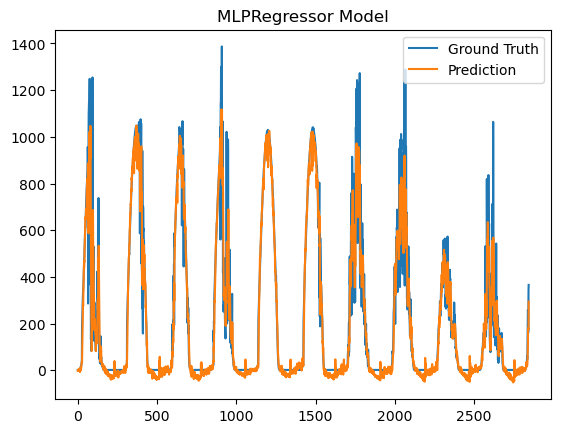

In [18]:
predict.my_self(testY_ord,testPre,'MLPRegressor')


MAE: 45.39
RMSE: 91.4
R2 Score: 0.92
MAE: 45.39
RMSE: 91.4
R2 Score: 0.92
MAE: 45.39
RMSE: 91.4
R2 Score: 0.92


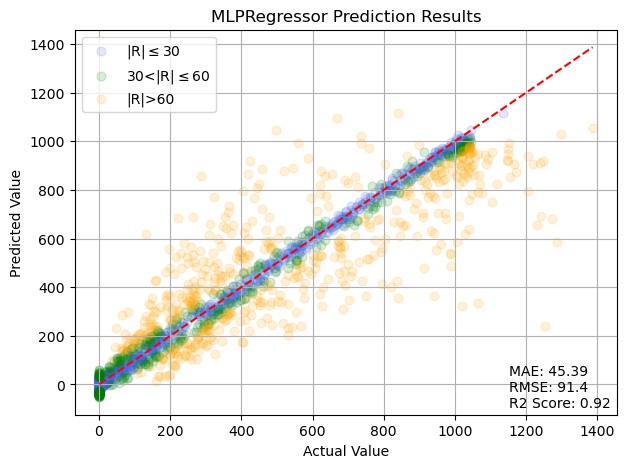

In [19]:
predict.score_calculation(testY_ord,testPre)
predict.plot_pred(testY_ord,testPre,'MLPRegressor')
predict.plot_residuals(testY_ord,testPre,'MLPRegressor')

In [ ]:
error=testY_ord-testPre
error=abs(error)
print(error)
error=sorted(error)
print(error[int(len(error)/3)])
print(error[int(len(error)*2/3)])

[[  4.2627954]
 [  4.735321 ]
 [  4.307092 ]
 ...
 [ 46.492065 ]
 [164.20407  ]
 [ 71.88104  ]]
[11.069641]
[30.34137]
